For this problem, your task will be to implement kernel ridge regression
(see the solution to mid-sem exam question 6) and ridge regression with landmark based features (let’s call
the latter simply “landmark-ridge”), and train and test these two models on the provided dataset (already split
into training and test). For both models, you have to use the RBF kernel k(xn; xm) = exp(􀀀
jjxn 􀀀 xmjj2)
with bandwidth parameter 
 = 0:1. The training and test datasets are given in files ridgetrain.txt and
ridgetest.txt. In each file, each line is an example, with first number being the input (a single feature)
and the second number being the output.

1. For kernel ridge regression, train the model with the regularization hyperparameter lambda = 0:1 and use the
learned model to predict the outputs for the test data. Compare the model’s predictions with the true test
outputs (given to you) by plotting on a graph. In particular, plot all the test inputs and the corresponding
true outputs (x; y) on a 2D plot in blue color, and likewise all the test inputs and corresponding predicted
outputs in red color. Repeat this exercise for lambda = 1; 10; 100. What do you observe from the plots? For
each case, also report the root-mean-squared-error (RMSE) on the test data, which is defined as square
root of the mean of squared differences of true outputs and the predicted outputs.

RMSE for t = 0.1 is 0.03257767029357597


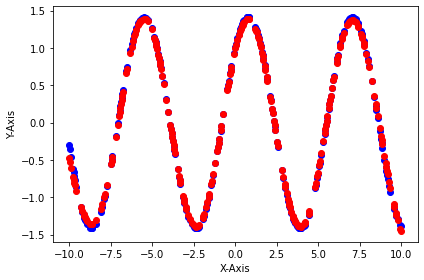

RMSE for t = 1 is 0.17030390344202537


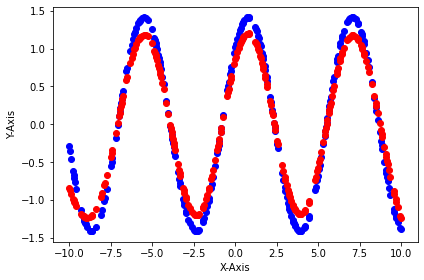

RMSE for t = 10 is 0.6092671596540067


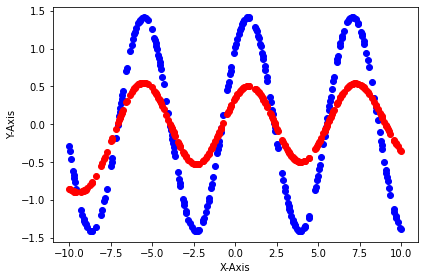

RMSE for t = 100 is 0.9110858052767243


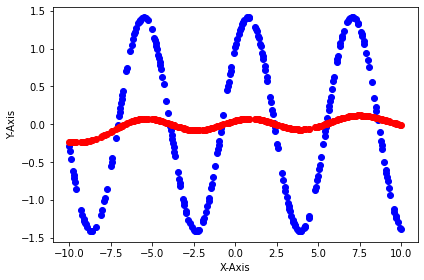

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# load training data
data = np.genfromtxt("ridgetrain.txt")
# input of training data
x_train = data[:,0]
x_train =  x_train.reshape(x_train.shape[0],1)
# output of training data
y_train = data[:,1] 
y_train = y_train.reshape(y_train.shape[0],1)

# Load test data
data1 = np.genfromtxt("ridgetest.txt")
# input of training data
x_test = data1[:,0]
x_test = x_test.reshape(x_test.shape[0],1)
# output of training data
y_test = data1[:,1] 
y_test = y_test.reshape(y_test.shape[0],1)

# Calculates Kernal matrix from trainiing data
def calculat_kernal(l,bp,x):
    K = np.zeros((l,l)) # Zero matrix of size l*l
    for i in range(l):
        for j in range(l):
            K[i][j] = np.exp(-bp*(np.dot((x_train[i]-x_train[j]).T,(x_train[i]-x_train[j])))) # RBF kernel 
    return K
 
# Generate plots
def plot_function(x,y, col):
    plt.scatter(x,y,color=col)
    plt.xlabel("X-Axis")
    plt.ylabel("Y-Axis")


# Predicts output against test input
def predict_y(t,bp):
    a = np.dot(np.linalg.inv(K+t*np.eye(l)),y_train)

    y_pred = np.zeros((y_test.size,1))  # array for predicted outputs

    for i in range(x_test.size):
        for j in range(l):
            y_pred[i] += a[j]*np.exp(-bp*(np.dot((x_test[i]-x_train[j]).T,(x_test[i]-x_train[j]))))
    
    # Calculate RMSE 
    rmse = np.sqrt(np.dot((y_test-y_pred).T,(y_test-y_pred)) / y_pred.size)
    print("RMSE for t = {} is {}".format(t,float(rmse)))
    
    plot_function(x_test,y_test,'b')
    plot_function(x_test,y_pred,'r')
    plt.tight_layout(h_pad= 1)
    plt.show()
    
    


# calculate Kernel Matrix
l = x_train.shape[0]
bp = 0.1 # bandwidth parameter of RBF kernel
K = calculat_kernal(l,bp,x_train)

# hyperparameter for ridge regression
t = [0.1,1,10,100]
for i in t:
    predict_y(i,bp)


RMSE for L = 2 is 0.9753470239472105


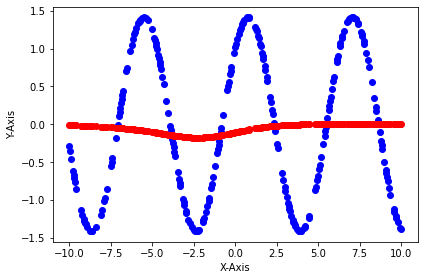

RMSE for L = 5 is 0.8116440864500327


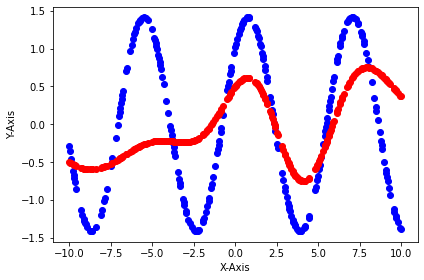

RMSE for L = 20 is 0.21270557878996726


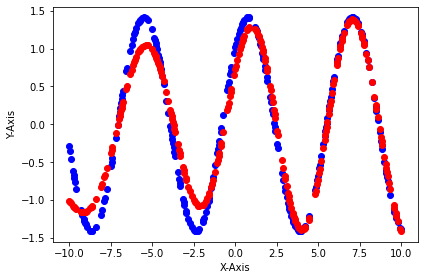

RMSE for L = 50 is 0.07007491627765752


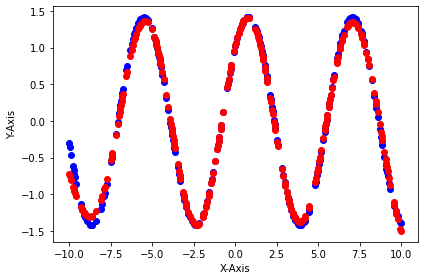

RMSE for L = 100 is 0.056881579279313664


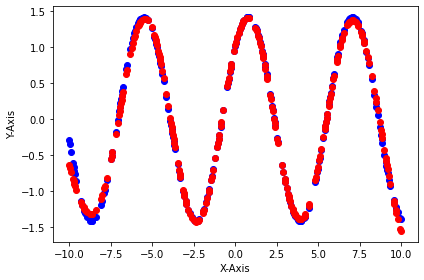

In [3]:
# Part a2 for programming problem 1:

def transform_x(x, z):
    return np.exp(-0.1*np.square(x - z))

def trainModel_and_plot_results(z,l):
    new_train_x = transform_x(x_train, z)
    new_test_x = transform_x(x_test, z)
#     print(new_test_x.shape)
    t = 0.1 # hyper-parameter for ridge regression
    w = np.dot(np.linalg.inv(np.dot(new_train_x.T,new_train_x)+ t*np.eye(new_train_x.shape[1])), np.dot(new_train_x.T,y_train))
    new_y_pred = np.dot(new_test_x,w)
    
    # Calculate RMSE 
    rmse = np.sqrt(np.dot((y_test-new_y_pred).T,(y_test-new_y_pred)) / y_test.size)
    print("RMSE for L = {} is {}".format(l,float(rmse)))
    
    plot_function(x_test,y_test,'b')
    plot_function(x_test,new_y_pred,'r')
    plt.tight_layout(h_pad= 1)
    plt.show()
    
L = [2,5,20,50,100] # landmark points
for l in L:
    z = np.random.choice(x_train.flatten(),l, replace=False)
    trainModel_and_plot_results(z,l)
